1. выполнить анализ и охарактеризовать клиентский портфель организации
2. построить базовую модель прогнозирования банкротства, одобряющую не менее 35% клиентов при банкротстве среди одобренных не выше 15%.
3. подготовить рекомендации и предложения по изменению признакового пространства, использованию внешних данных и иному развитию базовой модели.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_issued = pd.read_csv('https://dl.dropboxusercontent.com/s/6tg4aa9kt1y3dar/new_training_data_31_08_2022.csv', index_col=0)
df_rejected = pd.read_csv('https://dl.dropboxusercontent.com/s/tnvo43de29nu1rb/all_reject_data.csv', index_col=0)

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df_rejected.head()

,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,isnt_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,isnt_active_12,is_lost_12,overdue_loans_12,micro_loans_active_12,is_active_3,open_sum_3,isnt_active_3,is_lost_3,overdue_loans_3,micro_loans_active_3,is_active_1,open_sum_1,isnt_active_1,is_lost_1,micro_loans_active_1,ratio_all_microloans_3_to_12,ratio_overdue_loans_3_to_12,ratio_history_100,ratio_history_12,fraction_last_x_12,ratio_history_3,fraction_last_x_3,ratio_history_1,fraction_last_x_1,mean_delay_100_with_lag,mean_delay_12_with_lag,mean_delay_3_with_lag,mean_delay_1_with_lag,ratio_mean_delay_3_to_12,count_all_credits,ratio_pattern_len_to_pattern_1,ratio_pattern_len_to_pattern_2,ratio_pattern_len_to_pattern_3,ratio_pattern_len_to_pattern_4,ratio_pattern_len_to_pattern_bad_len,last_microloan_openeddt,is_type_credit_card_100,is_type_consumer_100,is_type_micro_100,is_active_type_credit_card_100,is_active_type_consumer_100,is_active_type_micro_100,is_type_credit_card_12,is_type_consumer_12,is_type_micro_12,is_active_type_credit_card_12,is_active_type_consumer_12,is_active_type_micro_12,is_type_credit_card_3,is_type_consumer_3,is_type_micro_3,is_active_type_credit_card_3,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12,ratio_sum_outstanding_to_open_sum
4,35.0,903.0,44683.0,0.0,43335.0,3.0,0.0,0.0,3500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,0.000000,NaN,0.000000,120.000000,0.000000,0.000000,0.000000,NaN,3.0,0.0,0.0,0.022222,0.022222,0.955556,1348.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.056551
6,32.0,4.0,0.0,0.0,1.0,31.0,361.0,0.0,403828.0,27.0,333828.0,187.0,0.0,0.0,333828.0,16.0,285828.0,23.0,0.0,0.0,285828.0,14.0,241828.0,6.0,0.0,241828.0,0.237500,NaN,0.0,0.0,0.545918,0.0,0.099490,0.0,0.051020,0.240000,0.000000,0.000000,0.000000,NaN,450.0,0.0,0.0,0.000000,0.000000,0.000000,4.0,3.0,2.0,445.0,1.0,0.0,30.0,1.0,2.0,240.0,0.0,0.0,27.0,0.0,0.0,57.0,0.0,0.0,16.0,0.0,0.0,35.0,0.0,0.0,14.0,0.0,NaN
9,25.0,17.0,0.0,0.0,1.0,31.0,29.0,0.0,401027.0,31.0,401027.0,28.0,0.0,0.0,401027.0,30.0,386027.0,17.0,0.0,0.0,386027.0,1.0,4000.0,0.0,0.0,4000.0,0.753623,NaN,0.0,0.0,0.983333,0.0,0.783333,0.0,0.016667,3.628571,3.214286,3.214286,3.214286,1.000000,70.0,0.0,0.0,0.000000,0.000000,0.000000,17.0,0.0,1.0,69.0,0.0,0.0,31.0,0.0,0.0,69.0,0.0,0.0,31.0,0.0,0.0,52.0,0.0,0.0,30.0,0.0,0.0,1.0,0.0,0.0,1.0,59.0,0.557095
10,42.0,2.0,0.0,0.0,1.0,38.0,206.0,0.0,844402.0,36.0,824602.0,131.0,0.0,0.0,824602.0,26.0,471052.0,18.0,0.0,0.0,471052.0,11.0,215779.0,1.0,0.0,215779.0,0.281081,NaN,0.0,0.0,0.684426,0.0,0.180328,0.0,0.049180,0.825279,0.665428,0.319703,0.133829,0.480447,269.0,0.0,0.0,0.000000,0.000000,0.000000,2.0,0.0,0.0,263.0,0.0,0.0,38.0,0.0,0.0,185.0,0.0,0.0,36.0,0.0,0.0,52.0,0.0,0.0,26.0,0.0,0.0,12.0,0.0,0.0,11.0,29.0,0.092473
12,38.0,204.0,73.0,0.0,1.0,39.0,98.0,0.0,600680.0,33.0,500980.0,67.0,0.0,0.0,500980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.729927,NaN,0.000000,NaN,0.000000,5.459627,3.453416,0.000000,0.000000,0.000000,161.0,1.0,0.0,0.000000,0.000000,0.000000,204.0,0.0,6.0,152.0,0.0,0.0,39.0,0.0,0.0,113.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.084674


In [5]:
df_rejected['target'] = np.nan

In [6]:
# столбец approved - одобрен или нет
df_issued['approved'] = 1
df_rejected['approved'] = 0

In [7]:
df_all_clients = pd.concat([df_issued, df_rejected])

In [8]:
df_all_clients.describe()

,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,isnt_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,isnt_active_12,is_lost_12,overdue_loans_12,micro_loans_active_12,is_active_3,open_sum_3,isnt_active_3,is_lost_3,overdue_loans_3,micro_loans_active_3,is_active_1,open_sum_1,isnt_active_1,is_lost_1,micro_loans_active_1,ratio_all_microloans_3_to_12,ratio_overdue_loans_3_to_12,ratio_history_100,ratio_history_12,fraction_last_x_12,ratio_history_3,fraction_last_x_3,ratio_history_1,fraction_last_x_1,mean_delay_100_with_lag,mean_delay_12_with_lag,mean_delay_3_with_lag,mean_delay_1_with_lag,ratio_mean_delay_3_to_12,count_all_credits,ratio_pattern_len_to_pattern_1,ratio_pattern_len_to_pattern_2,ratio_pattern_len_to_pattern_3,ratio_pattern_len_to_pattern_4,ratio_pattern_len_to_pattern_bad_len,last_microloan_openeddt,is_type_credit_card_100,is_type_consumer_100,is_type_micro_100,is_active_type_credit_card_100,is_active_type_consumer_100,is_active_type_micro_100,is_type_credit_card_12,is_type_consumer_12,is_type_micro_12,is_active_type_credit_card_12,is_active_type_consumer_12,is_active_type_micro_12,is_type_credit_card_3,is_type_consumer_3,is_type_micro_3,is_active_type_credit_card_3,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12,ratio_sum_outstanding_to_open_sum,target,approved
count,149040.000000,149040.000000,149040.000000,148893.00000,148893.000000,149040.000000,149040.000000,149040.000000,1.490400e+05,149040.000000,1.490400e+05,149040.000000,149040.000000,149040.0,1.490400e+05,149040.000000,1.490400e+05,149040.000000,149040.000000,149040.0,1.490400e+05,149040.000000,1.490400e+05,149040.000000,149040.000000,1.490400e+05,148419.000000,127333.0,149013.000000,148526.000000,149013.000000,146438.000000,149013.000000,144773.000000,149013.000000,149040.000000,149040.000000,149040.000000,149040.000000,143576.000000,149040.000000,148893.000000,148893.000000,148893.000000,148893.000000,148893.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,149040.000000,1.448600e+05,42529.000000,149040.000000
mean,33.363580,29.137118,307.682783,3.09175,1733.474717,13.387245,40.363808,1.986520,1.578954e+05,11.236587,2.507200e+05,25.585802,1.494827,0.0,1.470083e+05,8.949953,1.348426e+05,9.396041,0.660997,0.0,1.170864e+05,6.115774,7.680105e+04,1.878502,0.109494,7.252825e+04,0.616837,0.0,0.066026,0.075680,0.710969,0.064238,0.436703,0.020108,0.235318,16.749629,6.541693,2.240029,0.620759,0.290363,64.230603,0.199870,0.046550,0.045583,0.045099,-0.030567,90.525805,2.274108,4.034487,55.913916,1.473967,0.882817,10.998510,0.592458,0.753791,40.263003,0.544096,0.377087,10.306750,0.121612,0.227590,20.501664,0.118170,0.115184,8.714567,0.030878,0.085091,8.978174,0.030280,0.052784,6.032092,65.194371,NaN,0.277458,0.285353
std,8.903511,100.436634,3625.279321,49.63859,7659.052945,12.353431,69.986857,3.840825,2.205046e+05,11.203209,5.653730e+05,40.756554,3.409053,0.0,2.036448e+05,9.689543,2.709057e+05,15.227730,1.783904,0.0,1.618918e+05,7.140450,1.487853e+05,3.919085,0.479256,1.049549e+05,0.348918,0.0,0.120195,0.162074,0.280404,0.168276,0.308046,0.099744,0.241191,21.215825,13.409807,6.690912,2.493596,0.390803,90.497064,0.387526,0.156523,0.155599,0.155274,0.344214,1655.177686,2.825988,6.270288,86.893436,1.864971,1.454278,10.813809,1.128033,1.859251,54.411641,1.038540,0.875975,10.609585,0.481787,0.840304,26.794171,0.468413,0.423968,9.535458,0.243625,0.424658,12.110558,0.236901,0.273688,7.074289,51.800308,NaN,0.447750,0.451584
min,18.000000,1.000000,0.

In [9]:
# все данные являются количественными характеристиками, кроме approved и целевой - target:
df_all_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149040 entries, 0 to 91647
Data columns (total 75 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   149040 non-null  float64
 1   lastcredit                            149040 non-null  float64
 2   time_to_lastcredit_closeddt           149040 non-null  float64
 3   close_loan_median                     148893 non-null  float64
 4   open_loan_median                      148893 non-null  float64
 5   is_active_100                         149040 non-null  float64
 6   isnt_active_100                       149040 non-null  float64
 7   is_lost_100                           149040 non-null  float64
 8   micro_loans_active_100                149040 non-null  float64
 9   is_active_12                          149040 non-null  float64
 10  open_sum_12                           149040 non-null  float64
 11  i

In [10]:
df_all_clients.replace([np.inf, -np.inf], np.nan, inplace=True)

## Проверка данных на пропущенные значения

In [11]:
count_missing_values = df_all_clients.isnull().sum().sort_values(ascending=False)
percent_missing_values = (df_all_clients.isnull().sum()/df_all_clients.shape[0]*100).sort_values(ascending=False)

In [12]:
missing_values = pd.concat([count_missing_values, percent_missing_values], axis=1, keys=['Total', 'Percent'])
missing_values = missing_values.query('Total != 0')

In [13]:
missing_values.drop(['target'], inplace=True)

## Характеристика клиентского портфеля организации

In [14]:
count_approval = df_all_clients.groupby('approved').size()

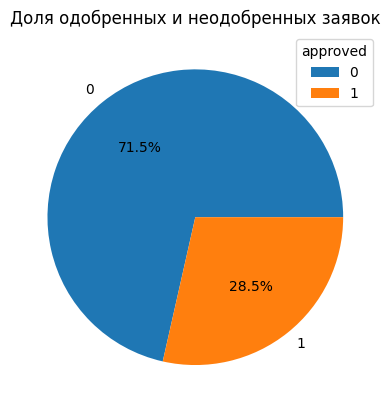

In [15]:
# approval visualization
fig, ax = plt.subplots()

ax.pie(count_approval, labels=count_approval.index, autopct='%1.1f%%')
ax.legend(title='approved')
ax.set_title('Доля одобренных и неодобренных заявок')
plt.show()

In [16]:
count_target = df_all_clients.groupby('target').size()

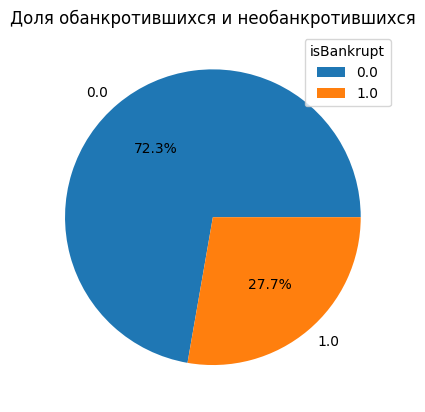

In [17]:
# Bankrupt visualization
fig, ax = plt.subplots()

ax.pie(count_target, labels=count_target.index, autopct='%1.1f%%')
ax.legend(title='isBankrupt')
ax.set_title('Доля обанкротившихся и необанкротившихся')
plt.show()

In [18]:
count_age = df_all_clients.groupby('age').size()
count_age_approved = df_issued.groupby('age').size()
count_age_isnt_approved = df_rejected.groupby('age').size()

In [19]:
df_count_age = pd.concat([count_age, count_age_approved, count_age_isnt_approved], axis=1, keys=['All', 'IsApproved', 'IsntApproved'])

In [20]:
df_count_age.fillna(0, inplace=True)

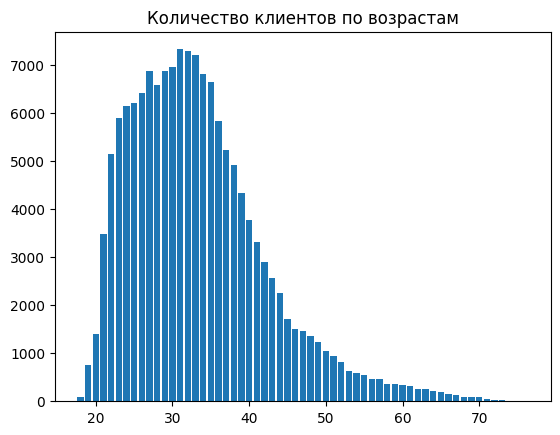

In [21]:
# age distribution
fig, ax = plt.subplots()

ax.bar(df_count_age.index, df_count_age['All'])
ax.set_title('Количество клиентов по возрастам')
plt.show()

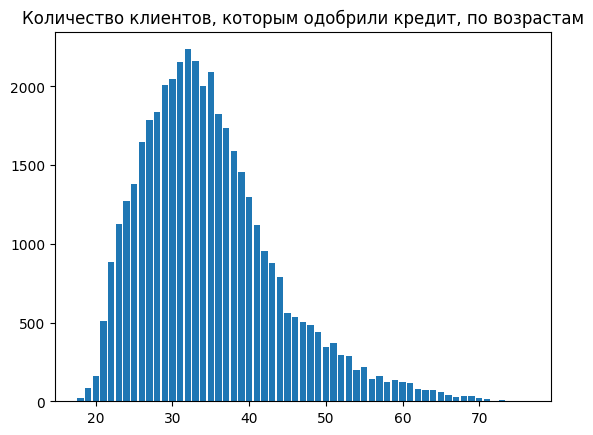

In [22]:
# age distribution
fig, ax = plt.subplots()

ax.bar(df_count_age.index, df_count_age['IsApproved'])
ax.set_title('Количество клиентов, которым одобрили кредит, по возрастам')
plt.show()

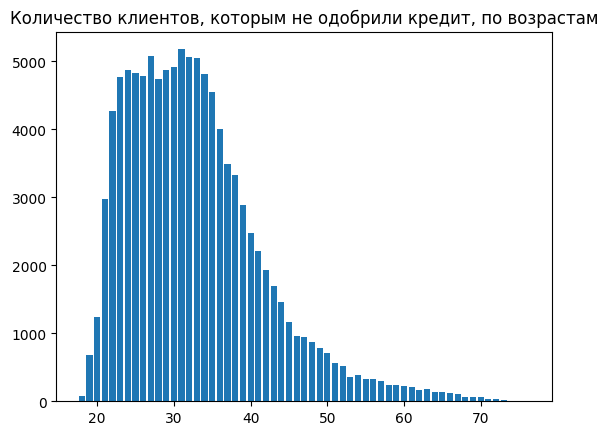

In [23]:
# age distribution
fig, ax = plt.subplots()

ax.bar(df_count_age.index, df_count_age['IsntApproved'])
ax.set_title('Количество клиентов, которым не одобрили кредит, по возрастам')
plt.show()

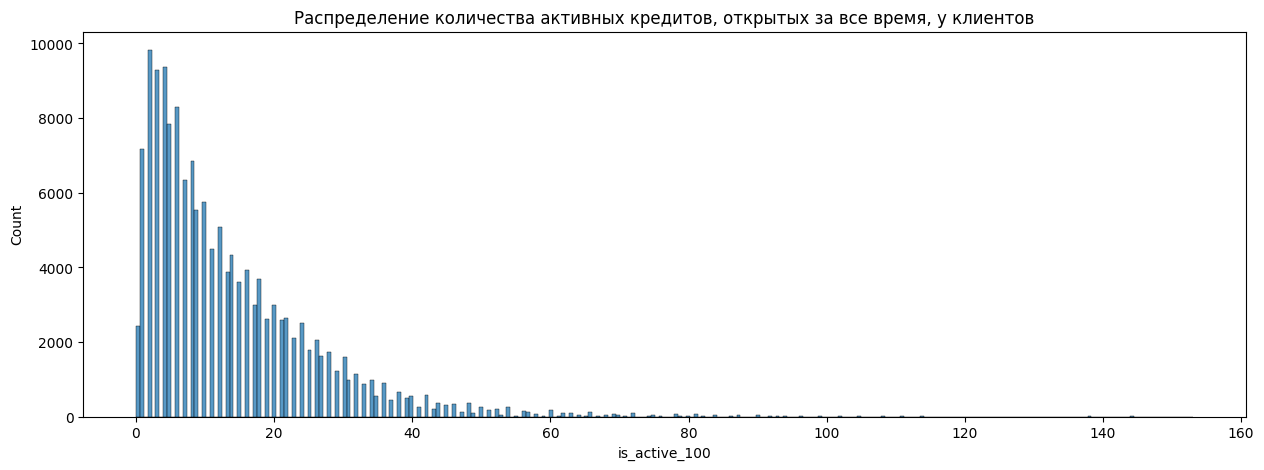

In [24]:
plt.figure(figsize=(15,5))
plt.title("Распределение количества активных кредитов, открытых за все время, у клиентов")
ax = sns.histplot(df_all_clients["is_active_100"])
plt.show()

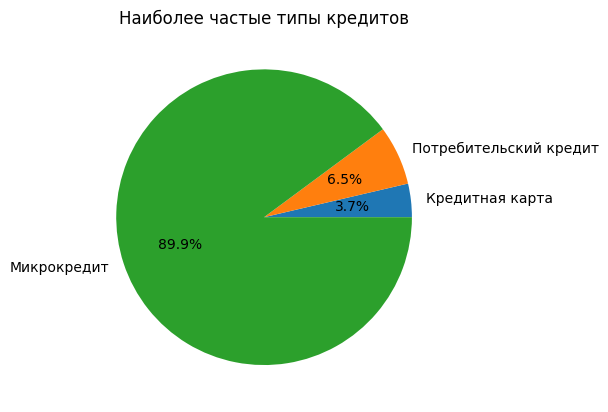

In [25]:
loan_types = df_all_clients.agg({
    'is_type_credit_card_100': 'sum',
    'is_type_consumer_100': 'sum',
    'is_type_micro_100': 'sum'})

types = ['Кредитная карта', 'Потребительский кредит', 'Микрокредит']

fig, ax = plt.subplots()

ax.pie(loan_types, labels=types, autopct='%1.1f%%')
ax.set_title('Наиболее частые типы кредитов')
plt.show()

## Обработка пропусков

In [26]:
# так как данные имеют относитено немного пропусков, восстановим значения с помощью IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [27]:
imputer = IterativeImputer(random_state=100, max_iter=10)
# возьмем только те столбцы, которые нужно восстановить
imputing_cols = df_all_clients[list(missing_values.index)]

In [28]:
imputer.fit(imputing_cols)

IterativeImputer(random_state=100)

In [29]:
imputed_cols = imputer.transform(imputing_cols)

In [30]:
df_all_clients_imputed = df_all_clients.copy()

In [32]:
df_all_clients_imputed.loc[:, list(missing_values.index)] = imputed_cols

In [33]:
# пустых значений нет
df_all_clients_imputed.isnull().sum()[df_all_clients_imputed.isnull().sum() > 0]

target    106511
dtype: int64

## Коэффициенты корреляции всех признаков

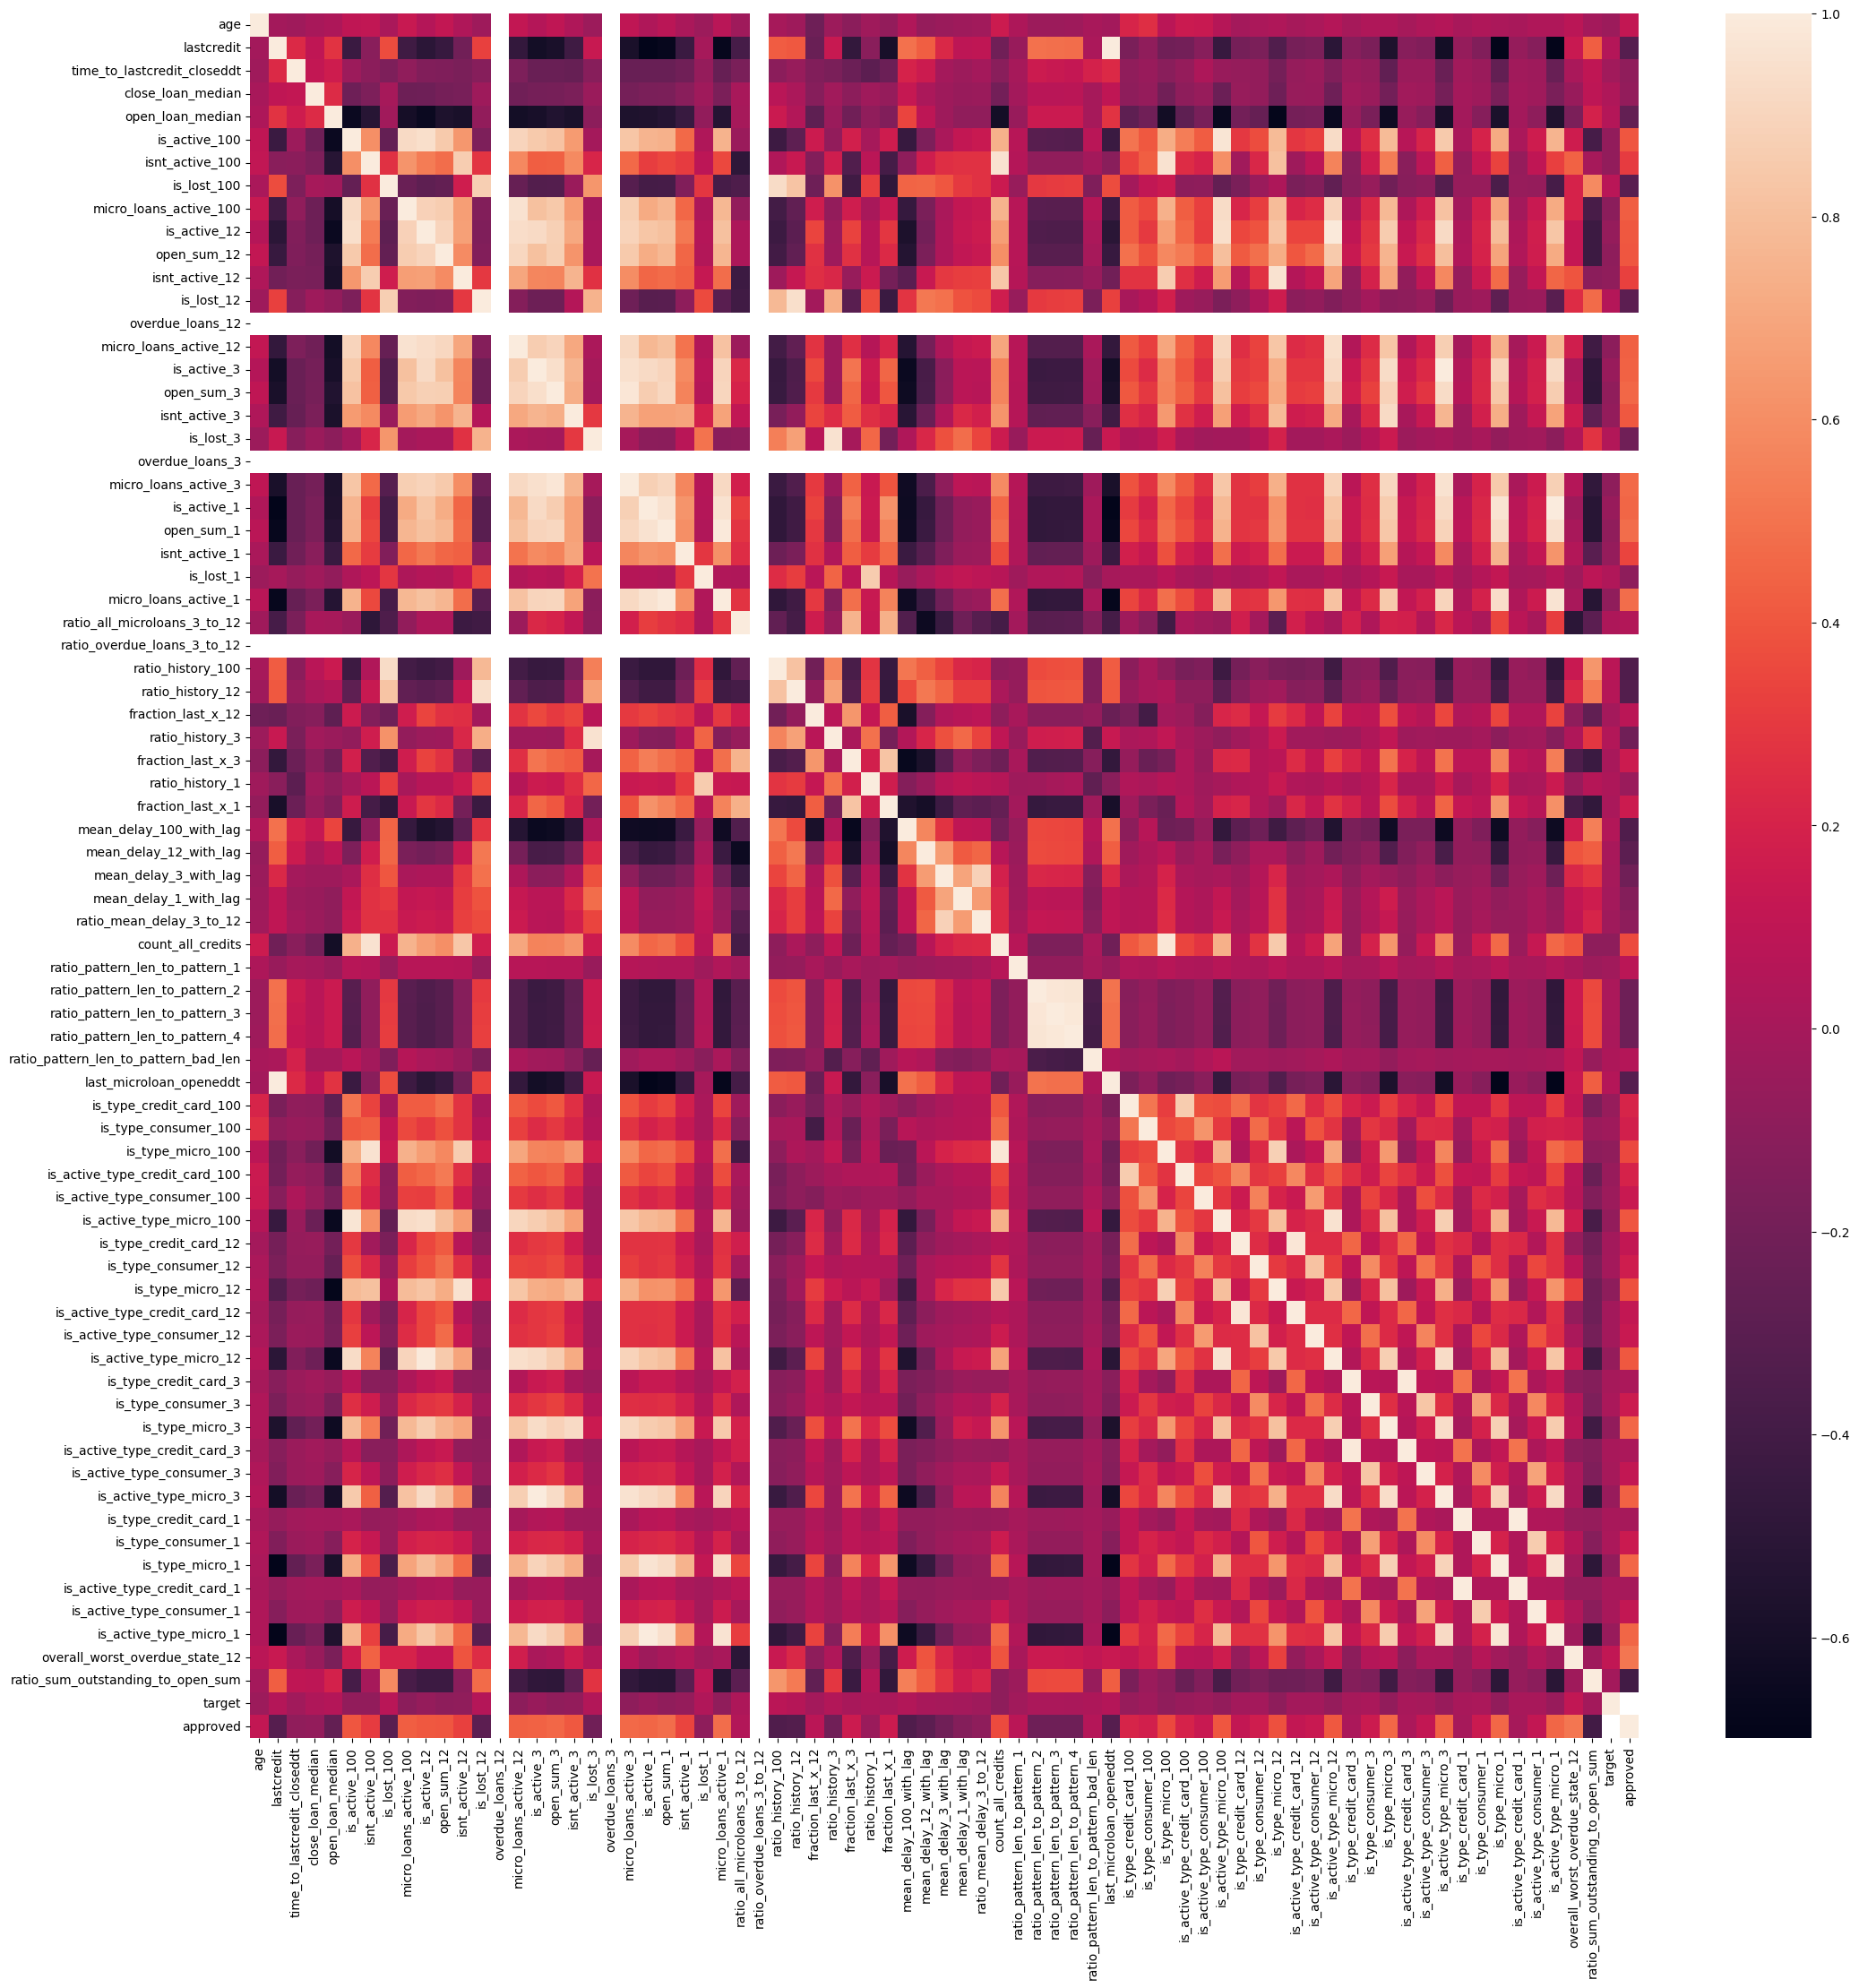

In [34]:
fig, ax = plt.subplots(figsize=(25, 25))
ax=sns.heatmap(df_all_clients_imputed.corr(method='spearman'))


<ipython-input-35-cca2f172f3bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_clients_imputed['ratio_overdue_loans_3_to_12'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='ratio_overdue_loans_3_to_12', ylabel='Density'>

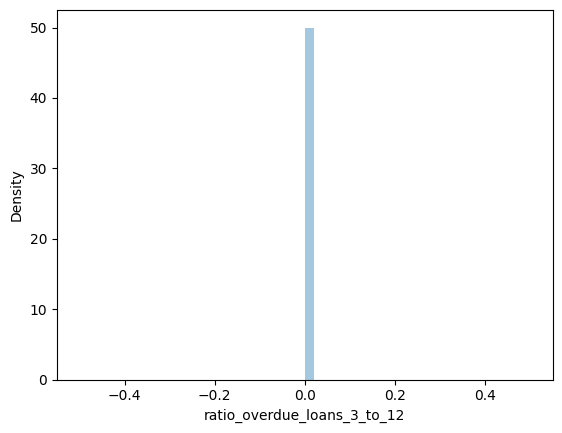

In [35]:
sns.distplot(df_all_clients_imputed['ratio_overdue_loans_3_to_12'])

<ipython-input-36-6125109f2cad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_clients_imputed['overdue_loans_12'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='overdue_loans_12', ylabel='Density'>

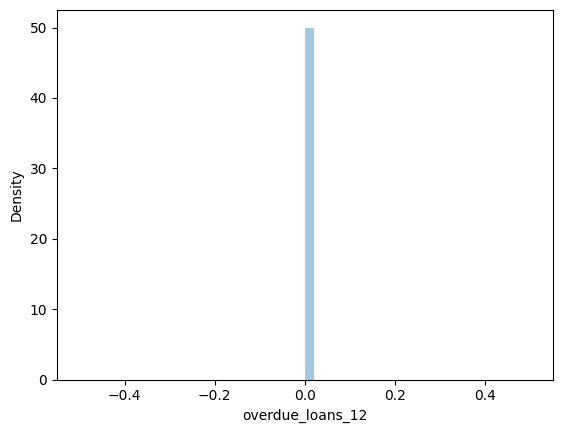

In [36]:
sns.distplot(df_all_clients_imputed['overdue_loans_12'])

<ipython-input-37-46460b5ed57c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_clients_imputed['last_microloan_openeddt'])


<Axes: xlabel='last_microloan_openeddt', ylabel='Density'>

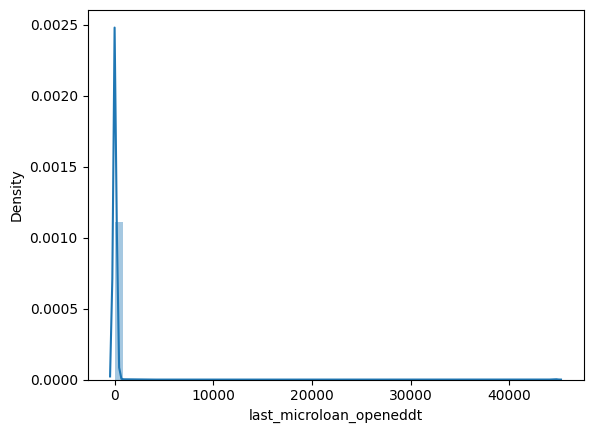

In [37]:
sns.distplot(df_all_clients_imputed['last_microloan_openeddt'])

<ipython-input-38-54aeb603abf2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_clients_imputed['ratio_pattern_len_to_pattern_3'])


<Axes: xlabel='ratio_pattern_len_to_pattern_3', ylabel='Density'>

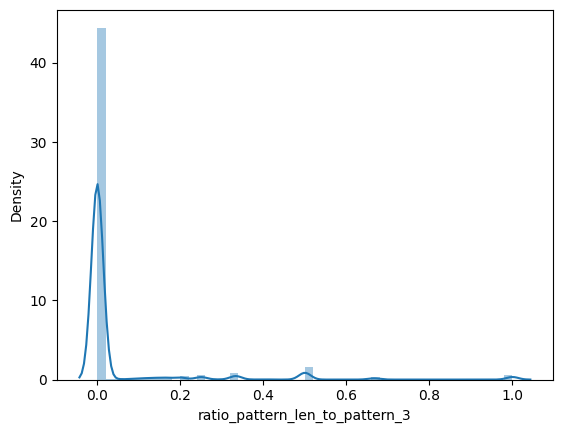

In [38]:
sns.distplot(df_all_clients_imputed['ratio_pattern_len_to_pattern_3'])

In [39]:
df_all_clients_imputed1 = df_all_clients_imputed.drop(columns=['ratio_overdue_loans_3_to_12', 'overdue_loans_12', 'overdue_loans_3', 'last_microloan_openeddt', 'ratio_pattern_len_to_pattern_3'],axis=1)

## Модель и оценка модели

In [40]:
df_issued1 = df_all_clients_imputed1[df_all_clients_imputed1['approved'] == 1]
x=df_issued1.drop(columns=['target', 'approved'],axis=1)
y=df_issued1['target']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
log_clf = LogisticRegression(solver="newton-cg", random_state=40)
log_clf.fit(x_train, y_train)
y_pred = log_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7215299004624187

In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9078  126]
 [3427  128]]


In [45]:
precision = cm[0][0]/(cm[0][0]+cm[0][1])

In [46]:
precision

0.9863102998696219

In [47]:
s_y_pred = pd.Series(y_pred)
s_y_pred.value_counts(1)

0.0    0.980092
1.0    0.019908
dtype: float64

Восстановим значения target в отклоненных заявках:
- кто отказался сам
- чья заявка отклонена

In [48]:
df_rejected1 = df_all_clients_imputed1[df_all_clients_imputed1['approved'] == 0]
x=df_rejected1.drop(columns=['target', 'approved'],axis=1)

In [49]:
rejected_pred = log_clf.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [50]:
rejected_pred
s_rejected_pred = pd.Series(rejected_pred)
s_rejected_pred.value_counts(1)

0.0    0.944973
1.0    0.055027
dtype: float64

**Рекомендации**

Дальнейшее развитие:

1) глубже анализируем, как избавиться от пропусков в каждом столбце;

2) подумать над удалением коррелирующих между собой независимых признаков;

3) глубже изучить выбросы, подумать над их удалением;

4) попробовать для решения данной задачи нейронные сети;

5) добавить номинативные признаки, например: на какие цели человек берет кредит, семейное положение клиента, профессия и т д.